In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
X = data.drop('RiskLevel', axis=1)  
y = data['RiskLevel']  
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = xgb.XGBClassifier(
    objective='multi:softmax',
)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [5]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8325123152709359


In [6]:
f1_weighted = f1_score(y_test, y_pred, average='weighted')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

print("Weighted F1 Score:", f1_weighted)
print("Weighted Precision:", precision_weighted)
print("Weighted Recall:", recall_weighted)

Weighted F1 Score: 0.8326832311376542
Weighted Precision: 0.8339901477832513
Weighted Recall: 0.8325123152709359


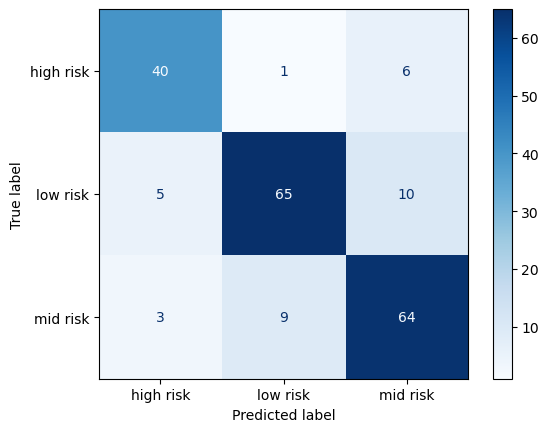

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")

In [15]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top most important variables and their scores
top_n = 10  # Change this to the desired number of top features
print("Top {} most important features:".format(top_n))
print(importance_df.head(top_n))

Top 10 most important features:
       Feature  Importance
1   SystolicBP    0.312358
3           BS    0.225540
4     BodyTemp    0.211897
2  DiastolicBP    0.085157
5    HeartRate    0.082558
0          Age    0.082490
